In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("final_dataset1.csv", index_col=0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


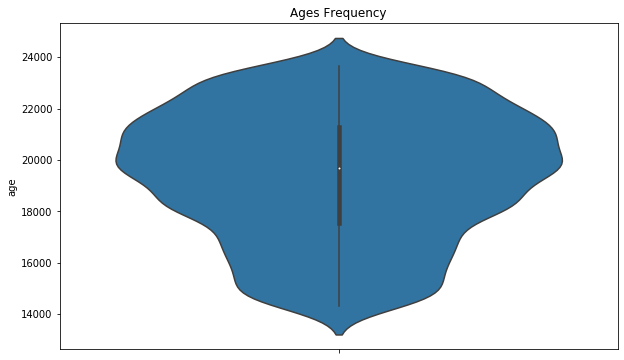

In [4]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["age"])
plt.show()

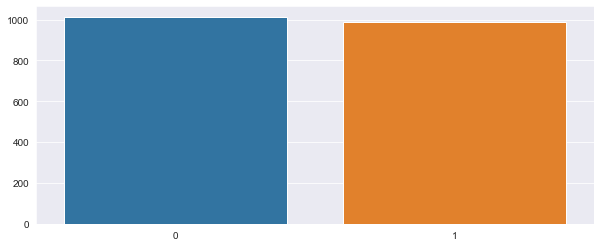

In [6]:
target = df.cardio.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=target.index, y=target.values)
plt.show()

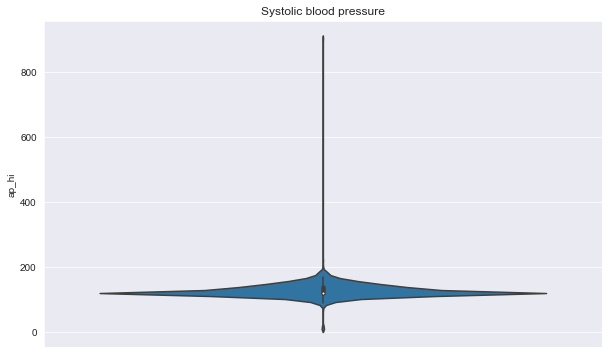

In [7]:
plt.figure(figsize=(10,6))
plt.title("Systolic blood pressure")
sns.axes_style("dark")
sns.violinplot(y=df["ap_hi"])
plt.show()

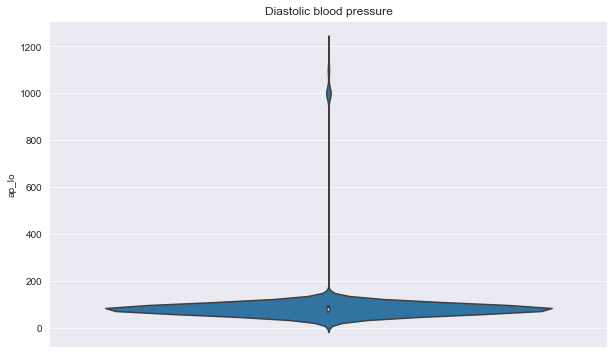

In [9]:
plt.figure(figsize=(10,6))
plt.title("Diastolic blood pressure")
sns.axes_style("dark")
sns.violinplot(y=df["ap_lo"])
plt.show()

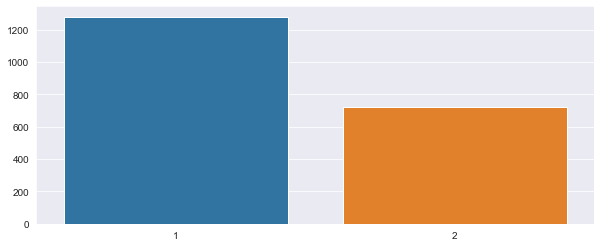

In [10]:
genders = df.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

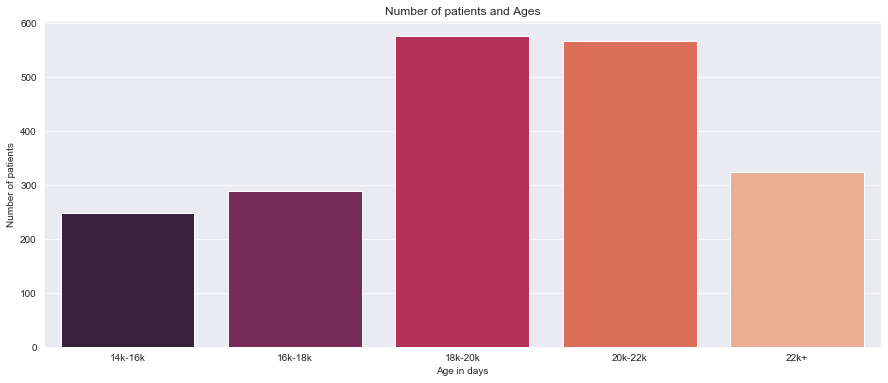

In [16]:
age1 = df.age[(df.age <= 16000) & (df.age >= 14000)]
age2 = df.age[(df.age <= 18000) & (df.age >= 16001)]
age3 = df.age[(df.age <= 20000) & (df.age >= 18001)]
age4 = df.age[(df.age <= 22000) & (df.age >= 20001)]
age5 = df.age[df.age >= 22001]

x = ["14k-16k","16k-18k","18k-20k","20k-22k","22k+"]
y = [len(age1.values),len(age2.values),len(age3.values),len(age4.values),len(age5.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of patients and Ages")
plt.xlabel("Age in days")
plt.ylabel("Number of patients")
plt.show()

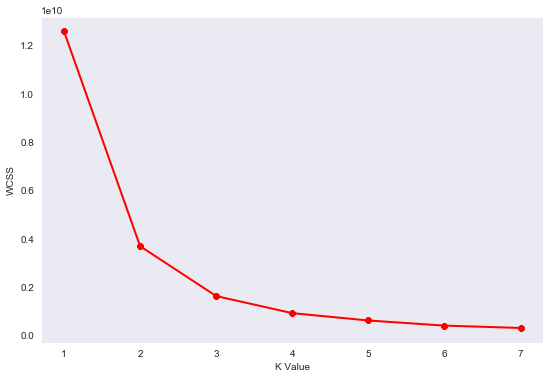

In [18]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(9,6))    
plt.grid()
plt.plot(range(1,8),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,8,1))
plt.ylabel("WCSS")
plt.show()

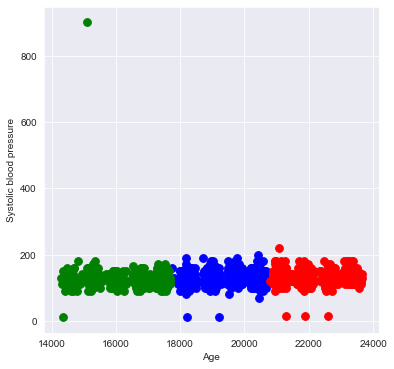

In [22]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.age[df.label == 0], df["ap_hi"][df.label == 0], c='blue', s=60)
ax.scatter(df.age[df.label == 1], df["ap_hi"][df.label == 1], c='red', s=60)
ax.scatter(df.age[df.label == 2], df["ap_hi"][df.label == 2], c='green', s=60)
plt.xlabel("Age")
plt.ylabel("Systolic blood pressure")

plt.show()

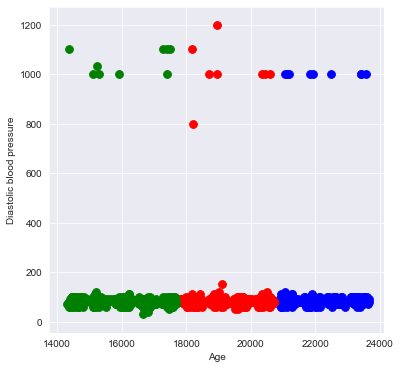

In [27]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.age[df.label == 0], df["ap_lo"][df.label == 0], c='blue', s=60)
ax.scatter(df.age[df.label == 1], df["ap_lo"][df.label == 1], c='red', s=60)
ax.scatter(df.age[df.label == 2], df["ap_lo"][df.label == 2], c='green', s=60)
plt.xlabel("Age")
plt.ylabel("Diastolic blood pressure")

plt.show()

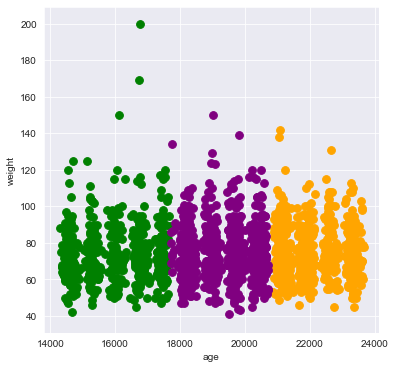

In [39]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.age[df.label == 0], df["weight"][df.label == 0], c='orange', s=60)
ax.scatter(df.age[df.label == 1], df["weight"][df.label == 1], c='green', s=60)
ax.scatter(df.age[df.label == 2], df["weight"][df.label == 2], c='purple', s=60)

plt.xlabel("age")
plt.ylabel("weight")

plt.show()

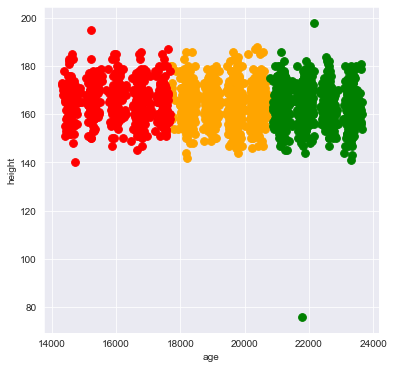

In [41]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.age[df.label == 0], df["height"][df.label == 0], c='orange', s=60)
ax.scatter(df.age[df.label == 1], df["height"][df.label == 1], c='green', s=60)
ax.scatter(df.age[df.label == 2], df["height"][df.label == 2], c='red', s=60)
plt.xlabel("age")
plt.ylabel("height")

plt.show()

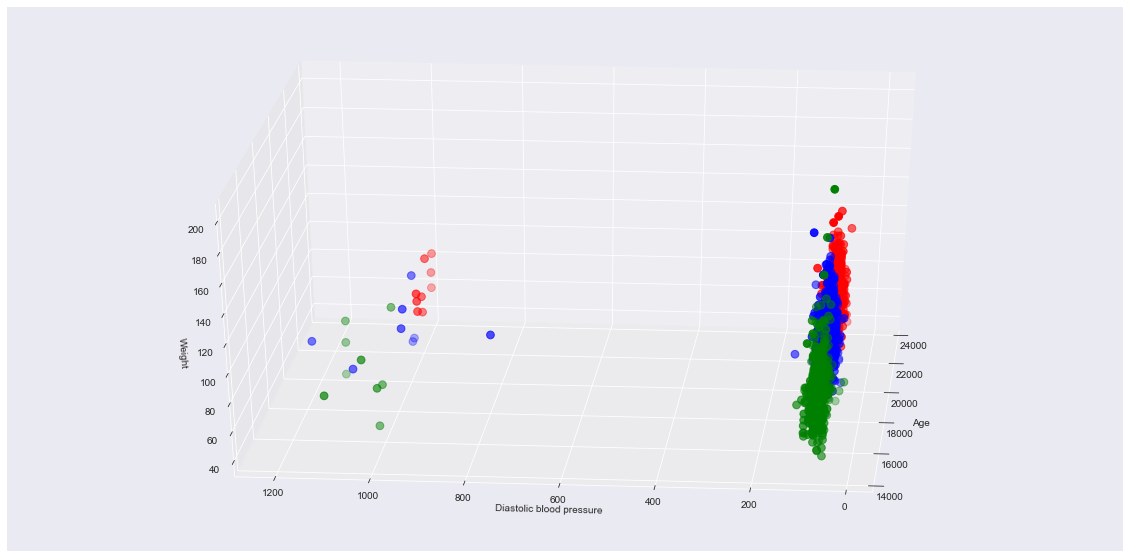

In [47]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.age[df.label == 0], df["ap_lo"][df.label == 0], df["weight"][df.label == 0], c='blue', s=60)
ax.scatter(df.age[df.label == 1], df["ap_lo"][df.label == 1], df["weight"][df.label == 1], c='red', s=60)
ax.scatter(df.age[df.label == 2], df["ap_lo"][df.label == 2], df["weight"][df.label == 2], c='green', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Diastolic blood pressure")
ax.set_zlabel('Weight')
plt.show()